In [2]:
# Data Cleaning
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
vg_sales = pd.read_csv('/Users/dell/Desktop/QTM_347/final/vgsales.csv')
#vg_sales = pd.read_csv('/Users/sophiaguo/Desktop/EMORY/senior/QTM 347/vgsales.csv')
vg_sales.head()
vg_sales.info()

duplicates = vg_sales.duplicated().sum()

# Handle missing values： “Year” and “Publisher”
vg_sales['Year'] = vg_sales['Year'].fillna(vg_sales['Year'].median())
vg_sales['Publisher'] = vg_sales['Publisher'].fillna('Unknown')
vg_sales['Year'] = vg_sales['Year'].astype(int)

cleaned_summary = {
    "Duplicates Removed": duplicates,
    "Missing Values (Post-Cleaning)": vg_sales.isnull().sum().to_dict(),
}

descriptive_stats = vg_sales.describe()

print("Data Cleaning Summary:", cleaned_summary)
print("Descriptive Statistics:", descriptive_stats)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
Data Cleaning Summary: {'Duplicates Removed': np.int64(0), 'Missing Values (Post-Cleaning)': {'Rank': 0, 'Name': 0, 'Platform': 0, 'Year': 0, 'Genre': 0, 'Publisher': 0, 'NA_Sales': 0, 'EU_Sales': 0, 'JP_Sales': 0, 'Other_Sales': 0, 'Global_Sales': 0}}
Descriptive Stati

In [6]:
# Find the top 5 selling games by Global_Sales
top5 = vg_sales.groupby('Name')['Global_Sales'].sum().nlargest(5)

# Filter the original DataFrame to display all columns for the top 5 games
top5_games = vg_sales[vg_sales['Name'].isin(top5.index)]

# Display all columns for the top 5 games
print("Top 5 Selling Games by Global Sales:")
print(top5_games)


Top 5 Selling Games by Global Sales:
      Rank                Name Platform  Year     Genre             Publisher  \
0        1          Wii Sports      Wii  2006    Sports              Nintendo   
1        2   Super Mario Bros.      NES  1985  Platform              Nintendo   
2        3      Mario Kart Wii      Wii  2008    Racing              Nintendo   
5        6              Tetris       GB  1989    Puzzle              Nintendo   
16      17  Grand Theft Auto V      PS3  2013    Action  Take-Two Interactive   
23      24  Grand Theft Auto V     X360  2013    Action  Take-Two Interactive   
44      45  Grand Theft Auto V      PS4  2014    Action  Take-Two Interactive   
155    156              Tetris      NES  1988    Puzzle              Nintendo   
197    198  Grand Theft Auto V     XOne  2014    Action  Take-Two Interactive   
200    201   Super Mario Bros.       GB  1999  Platform              Nintendo   
1896  1898  Grand Theft Auto V       PC  2015    Action  Take-Two Intera

In [3]:
vg_sales["Rank"]
import pandas as pd

# Assuming vg_sales is the dataset and it contains the 'Rank' column

# Define the categories and their labels
rank_categories = ['Very High', 'High', 'Medium', 'Low', 'Very Low']

# Categorize 'Rank' into five categories based on quantiles
vg_sales['Rank_Category'] = pd.qcut(
    vg_sales['Rank'], 
    q=5, 
    labels=rank_categories
)

# Display the first few rows to verify the categorization
print(vg_sales[['Rank', 'Rank_Category']].head())
vg_sales["Rank_Category"]

   Rank Rank_Category
0     1     Very High
1     2     Very High
2     3     Very High
3     4     Very High
4     5     Very High


0        Very High
1        Very High
2        Very High
3        Very High
4        Very High
           ...    
16593     Very Low
16594     Very Low
16595     Very Low
16596     Very Low
16597     Very Low
Name: Rank_Category, Length: 16598, dtype: category
Categories (5, object): ['Very High' < 'High' < 'Medium' < 'Low' < 'Very Low']

/var/folders/nr/tkxm_1912292k5dbxrmqfv4m0000gn/T/ipykernel_6640/2156589175.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/var/folders/nr/tkxm_1912292k5dbxrmqfv4m0000gn/T/ipykernel_6640/2156589175.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/nr/tkxm_1912292k5dbxrmqfv4m0000gn/T/ipykernel_6640/2156589175.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/var/folders/nr/tkxm_1912292k5dbxrmqfv4m0000gn/T/ipykernel_6640/2156589175.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/nr/tkxm_1912292k5dbxrmqfv4m0000gn/T/ipykernel_6

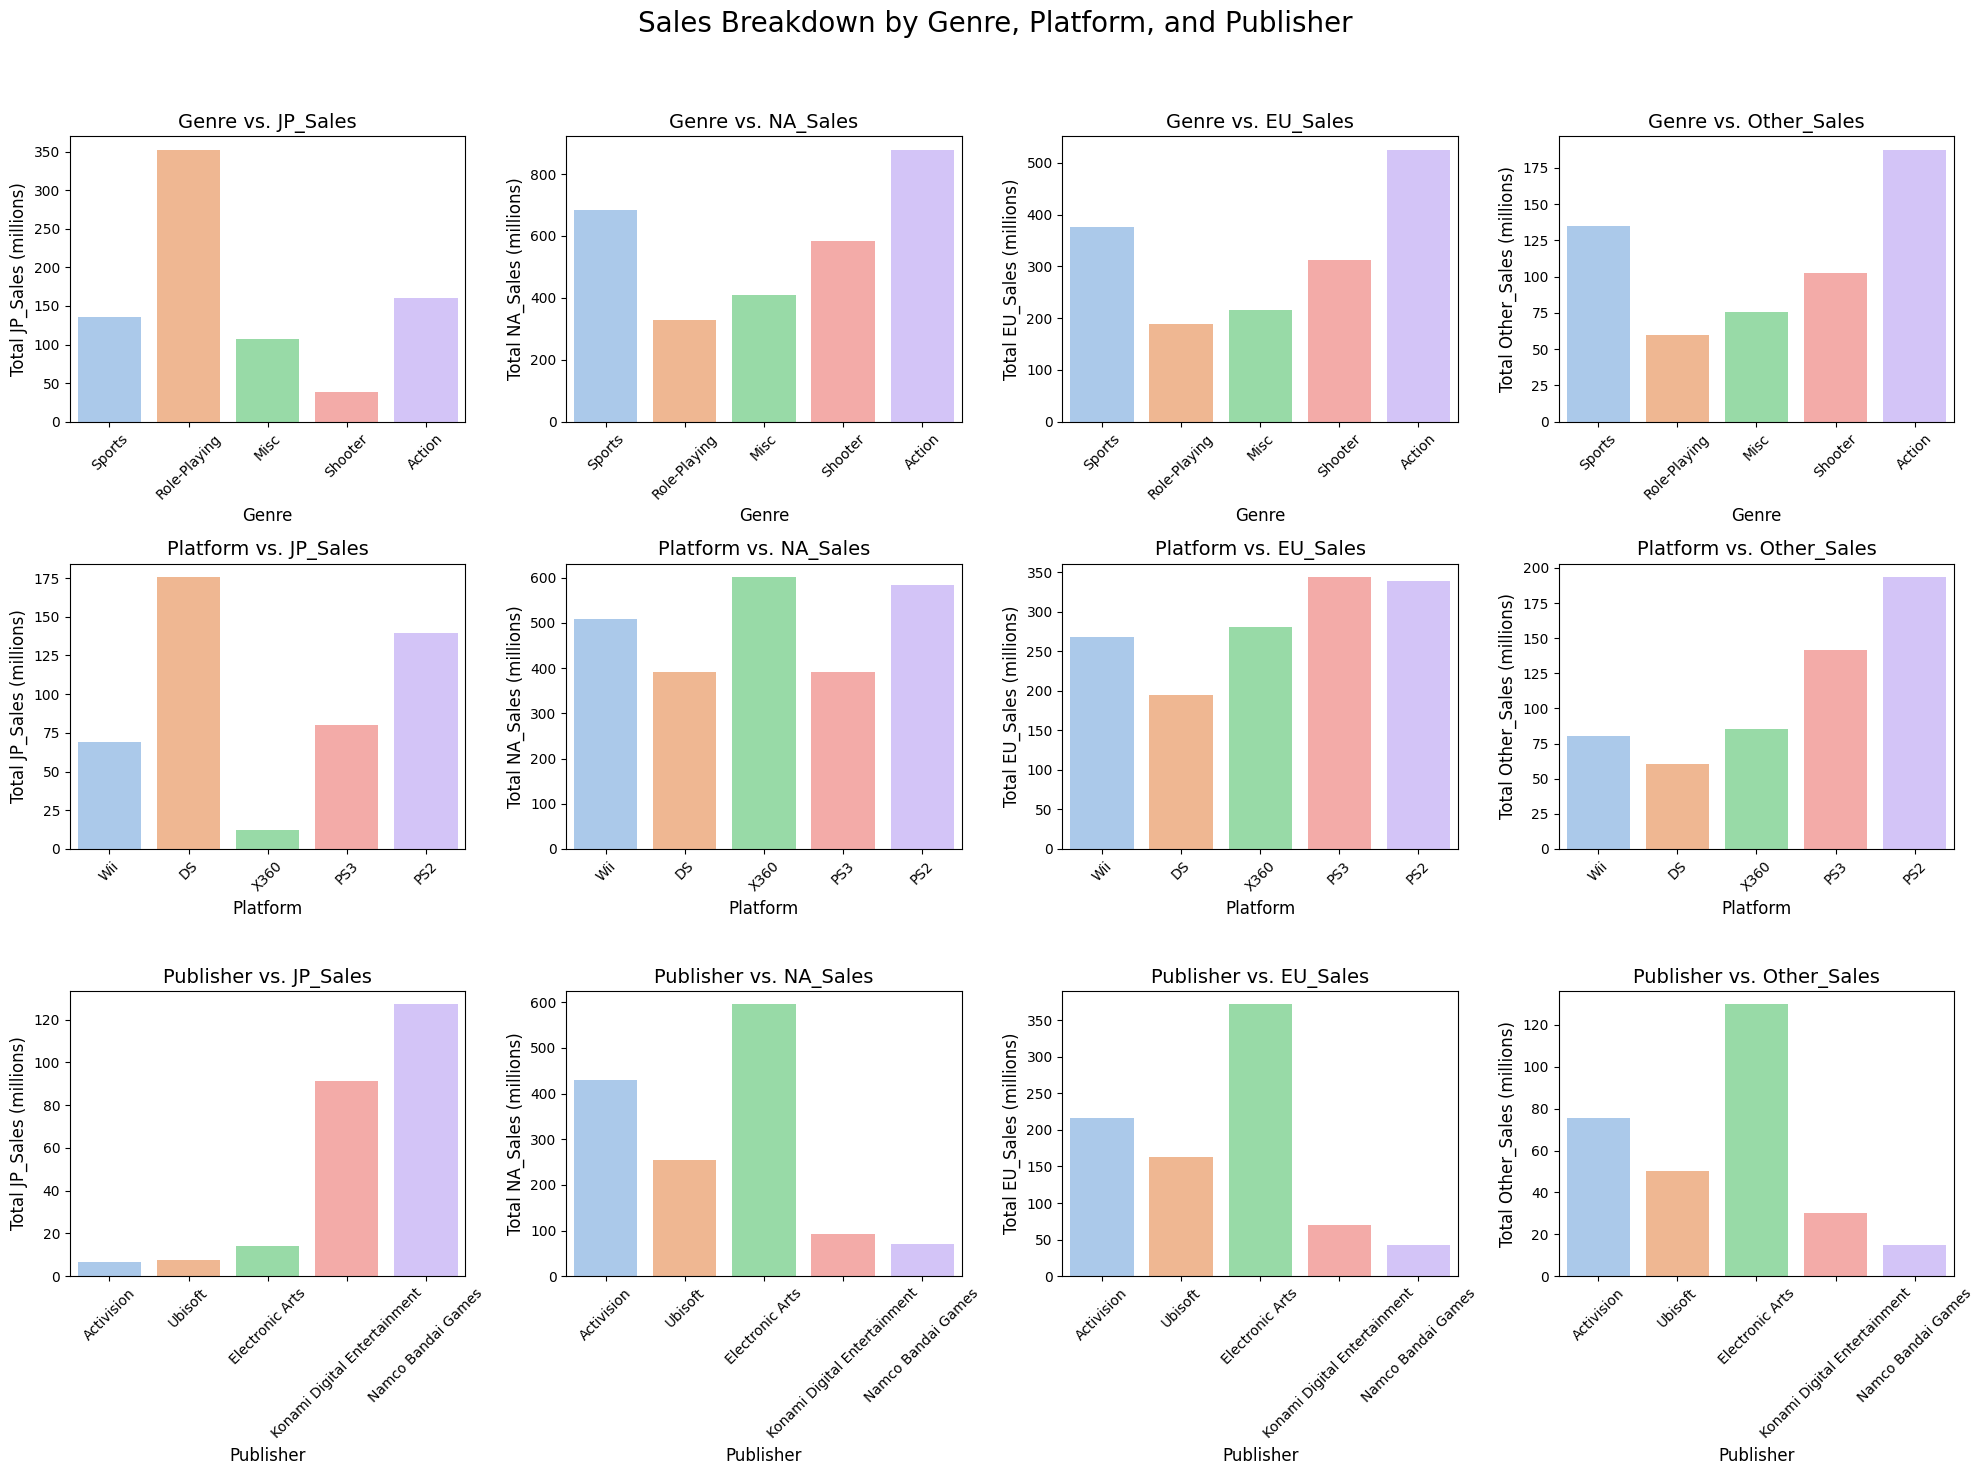

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 5 genres, platforms, and publishers based on frequency
top_5_genres = vg_sales['Genre'].value_counts().head(5).index
top_5_platforms = vg_sales['Platform'].value_counts().head(5).index
top_5_publishers = vg_sales['Publisher'].value_counts().head(5).index

# Filter the dataset to include only the top 5 genres, platforms, and publishers
filtered_data_genre = vg_sales[vg_sales['Genre'].isin(top_5_genres)]
filtered_data_platform = vg_sales[vg_sales['Platform'].isin(top_5_platforms)]
filtered_data_publisher = vg_sales[vg_sales['Publisher'].isin(top_5_publishers)]

# Define sales columns
sales_columns = ['JP_Sales', 'NA_Sales', 'EU_Sales', 'Other_Sales']

# Create a 3x4 grid of subplots
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
fig.suptitle('Sales Breakdown by Genre, Platform, and Publisher', fontsize=20)

# Plot for Genre
for i, sales_col in enumerate(sales_columns):
    sns.barplot(
        data=filtered_data_genre, 
        x='Genre', 
        y=sales_col, 
        estimator=sum, 
        ci=None, 
        palette='pastel', 
        ax=axes[0, i]
    )
    axes[0, i].set_title(f'Genre vs. {sales_col}', fontsize=14)
    axes[0, i].set_xlabel('Genre', fontsize=12)
    axes[0, i].set_ylabel(f'Total {sales_col} (millions)', fontsize=12)
    axes[0, i].tick_params(axis='x', rotation=45)

# Plot for Platform
for i, sales_col in enumerate(sales_columns):
    sns.barplot(
        data=filtered_data_platform, 
        x='Platform', 
        y=sales_col, 
        estimator=sum, 
        ci=None, 
        palette='pastel', 
        ax=axes[1, i]
    )
    axes[1, i].set_title(f'Platform vs. {sales_col}', fontsize=14)
    axes[1, i].set_xlabel('Platform', fontsize=12)
    axes[1, i].set_ylabel(f'Total {sales_col} (millions)', fontsize=12)
    axes[1, i].tick_params(axis='x', rotation=45)

# Plot for Publisher
for i, sales_col in enumerate(sales_columns):
    sns.barplot(
        data=filtered_data_publisher, 
        x='Publisher', 
        y=sales_col, 
        estimator=sum, 
        ci=None, 
        palette='pastel', 
        ax=axes[2, i]
    )
    axes[2, i].set_title(f'Publisher vs. {sales_col}', fontsize=14)
    axes[2, i].set_xlabel('Publisher', fontsize=12)
    axes[2, i].set_ylabel(f'Total {sales_col} (millions)', fontsize=12)
    axes[2, i].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


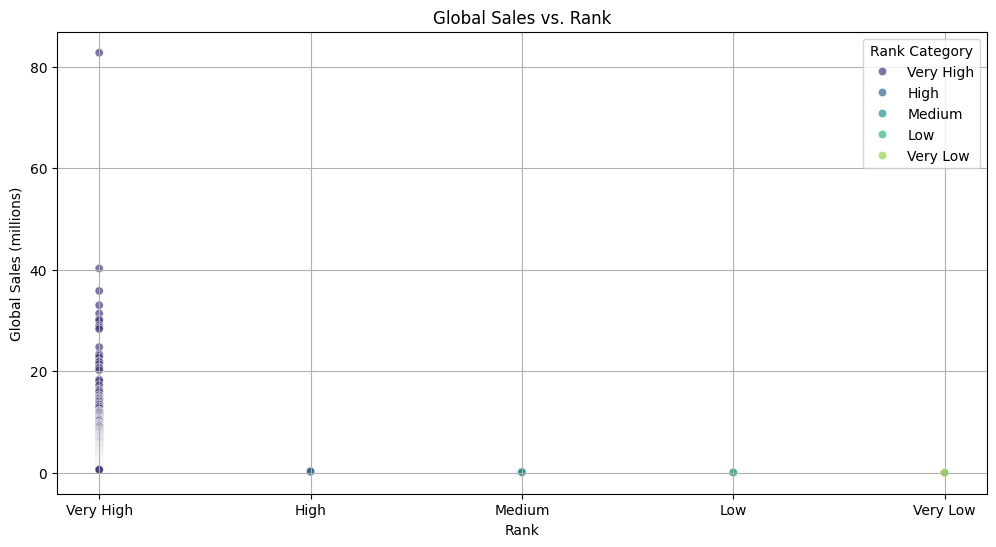

In [4]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=vg_sales, x='Rank_Category', y='Global_Sales', hue='Rank_Category', palette='viridis', alpha=0.7)
plt.title('Global Sales vs. Rank')
plt.xlabel('Rank')
plt.ylabel('Global Sales (millions)')
plt.legend(title='Rank Category')
plt.grid(True)
plt.show()

/var/folders/nr/tkxm_1912292k5dbxrmqfv4m0000gn/T/ipykernel_6559/4130549208.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  very_high_rank['Negative_Rank'] = -very_high_rank['Rank']
/var/folders/nr/tkxm_1912292k5dbxrmqfv4m0000gn/T/ipykernel_6559/4130549208.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=very_high_rank, x='Negative_Rank', y='Global_Sales', palette='viridis', alpha=0.7)


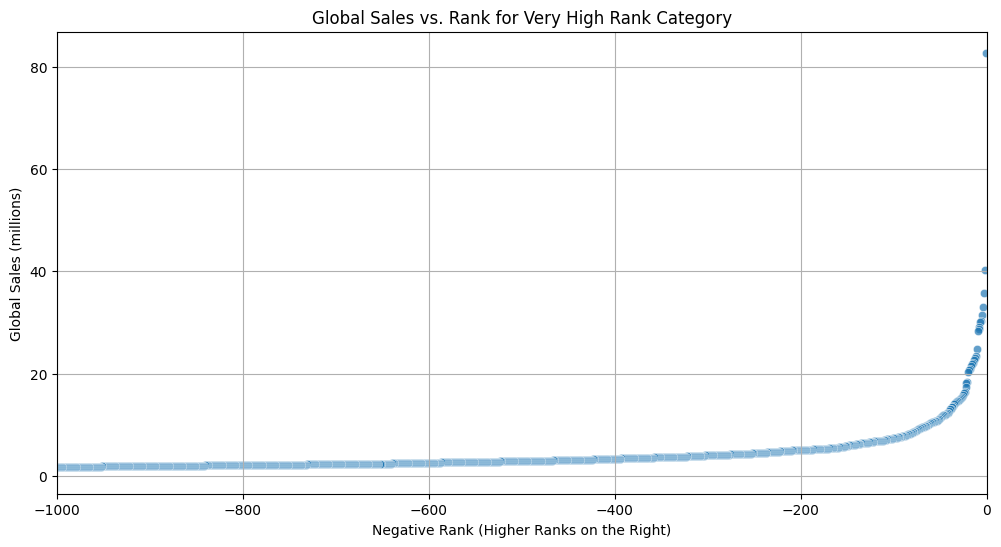

In [14]:
# Invert the Rank values for better interpretation
very_high_rank['Negative_Rank'] = -very_high_rank['Rank']

# Plot the data
plt.figure(figsize=(12, 6))
#limit x axis to 0 to 1000
plt.xlim(-1000, 0)
sns.scatterplot(data=very_high_rank, x='Negative_Rank', y='Global_Sales', palette='viridis', alpha=0.7)
plt.title('Global Sales vs. Rank for Very High Rank Category')
plt.xlabel('Negative Rank (Higher Ranks on the Right)')
plt.ylabel('Global Sales (millions)')
plt.grid(True)
plt.show()


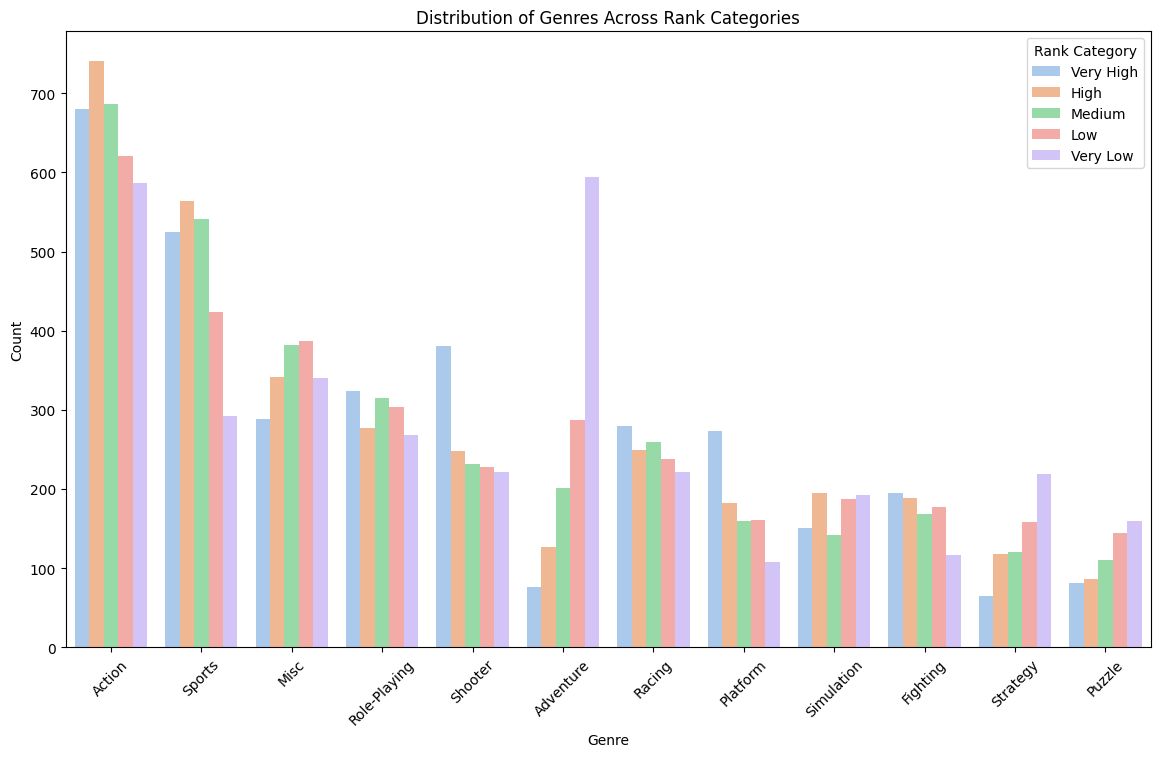

In [6]:

# Bar plot for Genre in relation to Rank_Category
plt.figure(figsize=(14, 8))
sns.countplot(data=vg_sales, x='Genre', hue='Rank_Category', order=vg_sales['Genre'].value_counts().index,palette='pastel')
plt.title('Distribution of Genres Across Rank Categories')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.legend(title='Rank Category')
plt.xticks(rotation=45)
plt.show()


/var/folders/nr/tkxm_1912292k5dbxrmqfv4m0000gn/T/ipykernel_6559/3749071334.py:15: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.countplot(


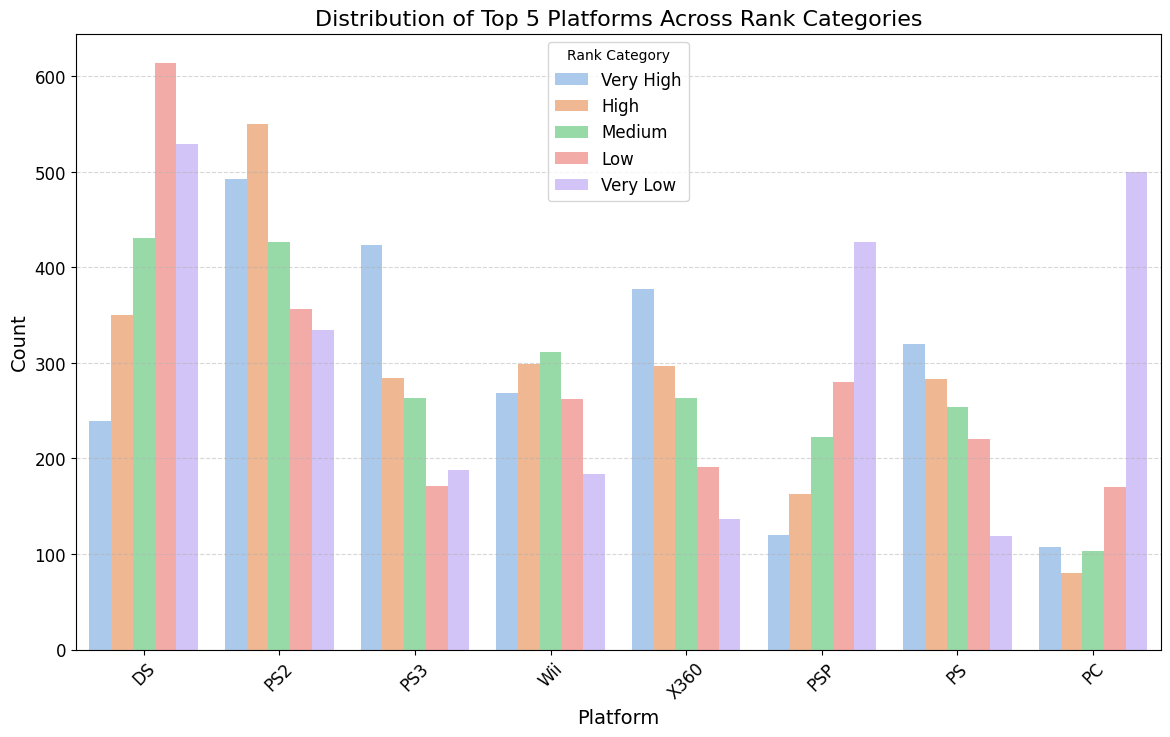

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the top 5 platforms based on frequency
top_5_platforms = vg_sales['Platform'].value_counts().head(8).index

# Filter the dataset to include only the top 5 platforms
filtered_data = vg_sales[vg_sales['Platform'].isin(top_5_platforms)]

# Define a pale color palette
pale_palette = sns.color_palette("pastel")

# Bar plot for Platform in relation to Rank_Category
plt.figure(figsize=(14, 8))
sns.countplot(
    data=filtered_data, 
    x='Platform', 
    hue='Rank_Category', 
    order=top_5_platforms, 
    palette=pale_palette  # Use pale colors
)
plt.title('Distribution of Top 5 Platforms Across Rank Categories', fontsize=16)
plt.xlabel('Platform', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Rank Category', fontsize=12)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


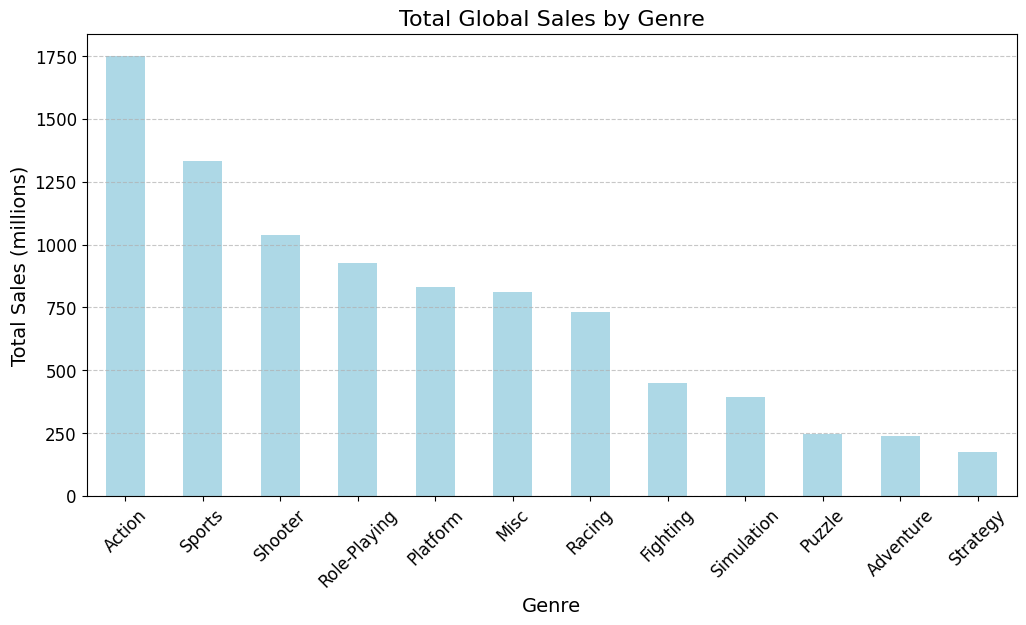

In [8]:
# Group and sum global sales by genre, then sort in descending order
genre_sales = vg_sales.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)

# Plot the data
plt.figure(figsize=(12, 6))
genre_sales.plot(kind='bar', color='#add8e6')  # Use a pale blue color
plt.title("Total Global Sales by Genre", fontsize=16)
plt.xlabel("Genre", fontsize=14)
plt.ylabel("Total Sales (millions)", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


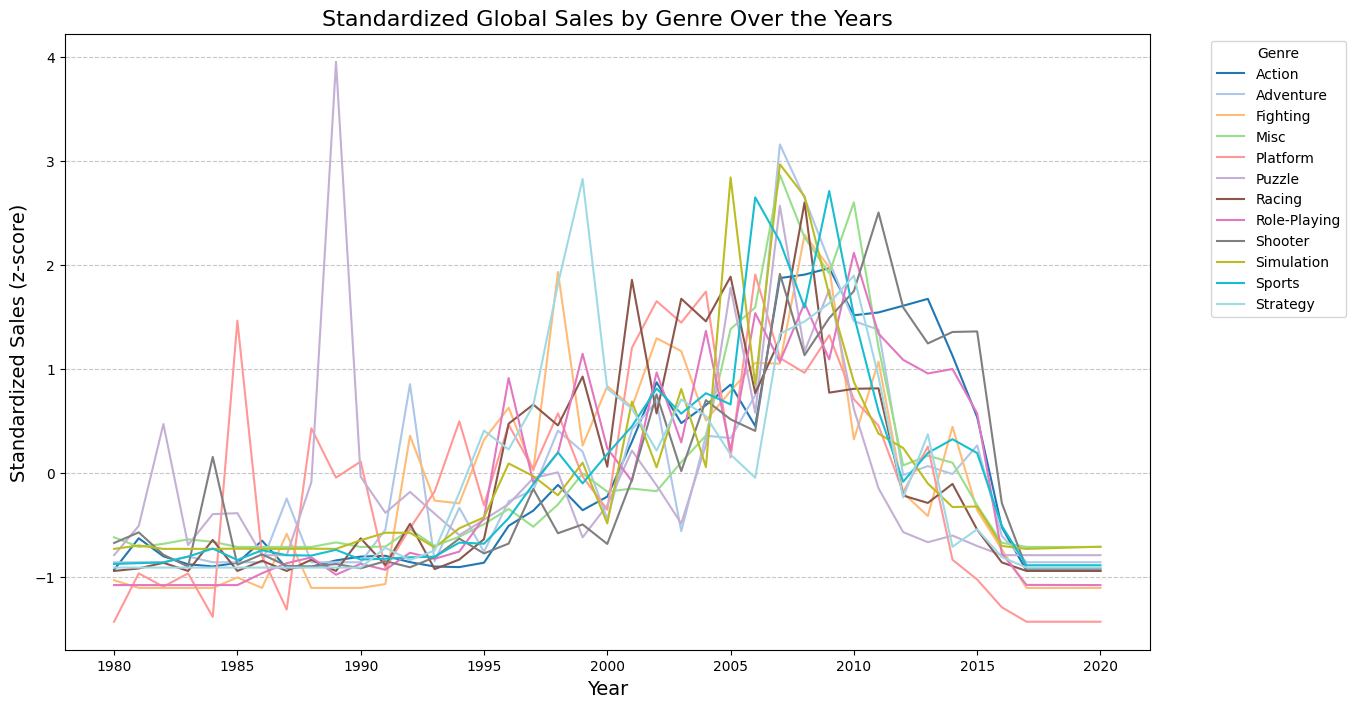

In [18]:
from sklearn.preprocessing import StandardScaler

# Group by Year and Genre, then sum the Global Sales
genre_year_sales = vg_sales.groupby(['Year', 'Genre'])['Global_Sales'].sum().unstack()

# Standardize the data
scaler = StandardScaler()
genre_year_sales_scaled = pd.DataFrame(
    scaler.fit_transform(genre_year_sales.fillna(0)),  # Fill NaN values with 0 for standardization
    index=genre_year_sales.index,
    columns=genre_year_sales.columns
)

# Plot the data
plt.figure(figsize=(14, 8))
genre_year_sales_scaled.plot(kind='line', stacked=False, colormap='tab20', ax=plt.gca())
plt.title("Standardized Global Sales by Genre Over the Years", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Standardized Sales (z-score)", fontsize=14)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


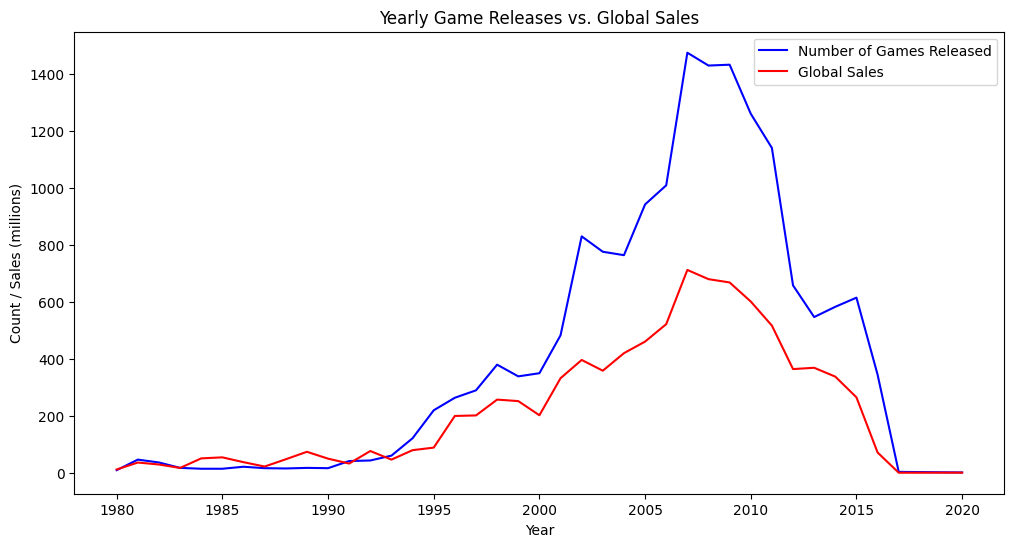

In [9]:
# Visualization: Yearly Game Releases and Sales 
plt.figure(figsize=(12, 6))
vg_sales.groupby('Year').size().plot(kind='line', label='Number of Games Released', color='blue')
vg_sales.groupby('Year')['Global_Sales'].sum().plot(kind='line', label='Global Sales', color='red')
plt.title("Yearly Game Releases vs. Global Sales")
plt.xlabel("Year")
plt.ylabel("Count / Sales (millions)")
plt.legend()
plt.show()

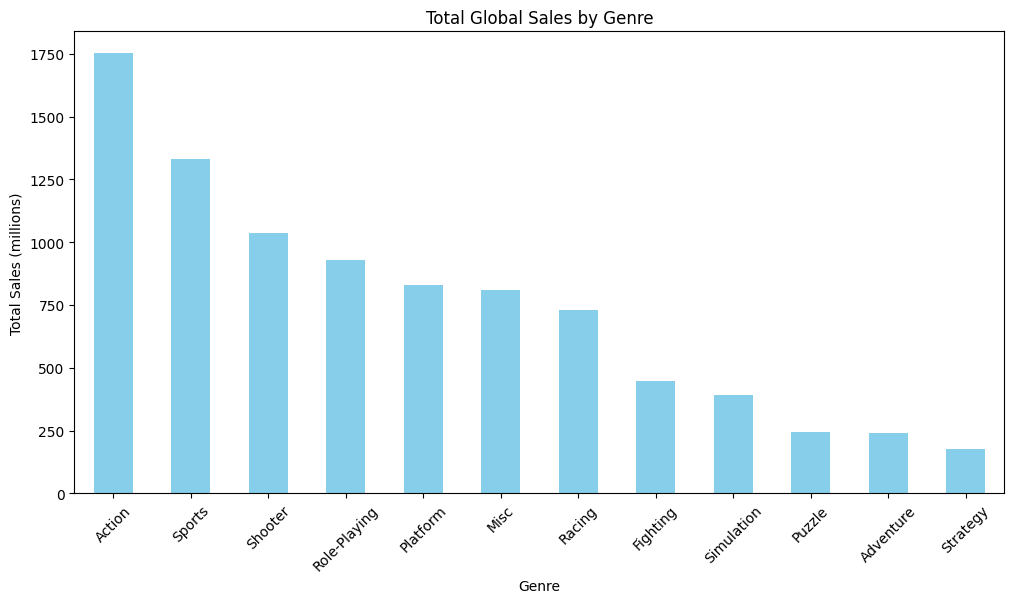

In [10]:
# Group and sum global sales by genre, then sort in descending order
genre_sales = vg_sales.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)

# Plot the data
plt.figure(figsize=(12, 6))
genre_sales.plot(kind='bar', color='skyblue')
plt.title("Total Global Sales by Genre")
plt.xlabel("Genre")
plt.ylabel("Total Sales (millions)")
plt.xticks(rotation=45)
plt.show()
